<a href="https://colab.research.google.com/github/kari-hue/MachineLearningModels/blob/main/KNN%20Algorithm/Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diabetes Detection - Using KNN Algorithm**

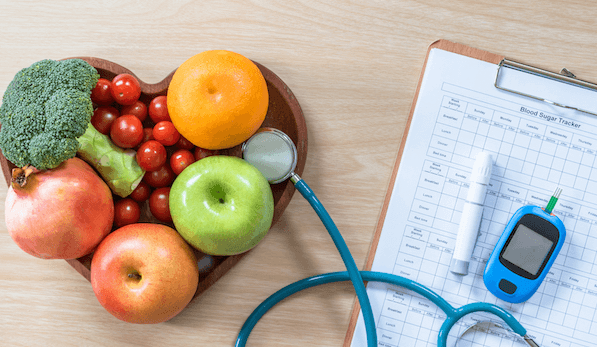

In [ ]:
## Let's import the libraries

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


In [ ]:
## Importing the dataset

df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
## Replaces the zero in the dataset as they hold no values and we can't generate any insight out of it

zero_not_accepted = ['Glucose','BloodPressure','SkinThickness','BMI','Insulin']

for column in zero_not_accepted:
  df[column] = df[column].replace(0,np.NaN)
  mean = int(df[column].mean(skipna=True))
  df[column] = df[column].replace(np.NaN,mean)


### **Splitting the dataset**

In [ ]:
## splitting the dataset

x = df.iloc[:,0:8]
y = df.iloc[:,8]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

### **Feature Scaling**





In [ ]:
## Using standardscaler

f_s = StandardScaler()
x_train = f_s.fit_transform(x_train)
x_test = f_s.transform(x_test)

In [ ]:
x_train.shape,x_test.shape

((614, 8), (154, 8))

In [ ]:
import math

math.sqrt(len(y_test))

12.409673645990857

In [ ]:
## Define the model: Init K-NN

classifier = KNeighborsClassifier(n_neighbors = 11,p=2,metric='euclidean')
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifier.predict(x_test)
print(y_pred)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0
 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0]


In [ ]:
## Evaluate the model

cm = confusion_matrix(y_test,y_pred)
print(cm)


[[94 13]
 [15 32]]


In [ ]:
## Let's find out the Accuracy score

print(f1_score(y_test,y_pred))


0.6956521739130436


In [ ]:
print(accuracy_score(y_test,y_pred))

0.8181818181818182
